# Sprint19 セグメンテーション1
KaggleのTGS Salt Identification Challengeのデータセットを使用し、セグメンテーションを行います。


TGS Salt Identification Challenge | Kaggle


セグメンテーション手法としてU-Net[1]を使います。


[1]O.Ronneberger, P.Fischer, T.Brox. U-Net: Convolutional Networks for Biomedical Image Segmentation. Medical Image Computing and Computer-Assisted Intervention (MICCAI), Springer, LNCS, Vol.9351: 234–241, 2015


https://arxiv.org/pdf/1505.04597.pdf

In [ ]:
import os
from PIL import Image
import numpy  as np
import tensorflow as tf
import keras
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
# 自分のマイドライブにマウントする

from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


##【問題1】学習・推定
以下のKeras実装を使用して学習・推定を行ってください。


zhixuhao/unet: unet for image segmentation


《GPU環境での学習》


大規模なデータセット、大きなモデルになるため、GPUを使用する必要があります。


《新たなデータセットの適用》


公開されている実装で用意されたものとは異なるデータセットを入力するための準備が必要です。

In [ ]:
print(os.getcwd())

/content


In [ ]:
# カレントディレクトリの変更
os.chdir('/content/drive/My Drive/')
# カレントディレクトリの取得
print(os.getcwd())

/content/drive/My Drive


In [ ]:
!mkdir Sprint19
!mv /content/drive/'My Drive'/'Colab Notebooks'/'Sprint19 セグメンテーション1.ipynb' /content/drive/'My Drive'/Sprint19/

In [ ]:
!pip install kaggle

In [ ]:
os.chdir('/content/')
# カレントディレクトリの取得
print(os.getcwd())

/content


In [ ]:
!mkdir .kaggle

In [ ]:
!ls -a

.  ..  .config	drive  .kaggle	sample_data


In [ ]:
import json

token = {"username":"toshihiromishiba","key":"6d5176cbdd7fda04d8594948e890ae36"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!chmod 600 /content/.kaggle/kaggle.json
!ls -a .kaggle

.  ..  kaggle.json


In [ ]:
!mkdir /root/.kaggle/
!cp -R /content/.kaggle/kaggle.json /root/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [ ]:
!ls -a /root/.kaggle/

.  ..  kaggle.json


In [ ]:
# カレントディレクトリの変更
os.chdir('/content/drive/My Drive/Sprint19/')
# カレントディレクトリの取得
print(os.getcwd())

/content/drive/My Drive/Sprint19


In [ ]:
!kaggle competitions list

ref                                               deadline             category            reward  teamCount  userHasEntered  
------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
tpu-getting-started                               2030-06-03 23:59:00  Getting Started      Kudos         67           False  
digit-recognizer                                  2030-01-01 00:00:00  Getting Started  Knowledge       3517           False  
titanic                                           2030-01-01 00:00:00  Getting Started  Knowledge      26532           False  
house-prices-advanced-regression-techniques       2030-01-01 00:00:00  Getting Started  Knowledge       5962            True  
connectx                                          2030-01-01 00:00:00  Getting Started  Knowledge        607           False  
nlp-getting-started                               2030-01-01 00:00:00  Getting Started      Kudos       1881   

In [ ]:
# kaggleのコンペからダウンロード
!kaggle competitions download -c tgs-salt-identification-challenge

 96% 156M/163M [00:01<00:00, 99.4MB/s]
100% 163M/163M [00:01<00:00, 96.7MB/s]
 96% 209M/217M [00:02<00:00, 115MB/s]
100% 217M/217M [00:02<00:00, 87.4MB/s]
  0% 0.00/922k [00:00<?, ?B/s]
100% 922k/922k [00:00<00:00, 61.5MB/s]
 92% 35.0M/37.9M [00:00<00:00, 65.7MB/s]
100% 37.9M/37.9M [00:00<00:00, 76.5MB/s]
 77% 32.0M/41.4M [00:00<00:00, 48.1MB/s]
100% 41.4M/41.4M [00:00<00:00, 66.7MB/s]
  0% 0.00/264k [00:00<?, ?B/s]
100% 264k/264k [00:00<00:00, 16.9MB/s]
  0% 0.00/322k [00:00<?, ?B/s]
100% 322k/322k [00:00<00:00, 44.5MB/s]


In [ ]:
!unzip /content/drive/'My Drive'/Sprint19/train.zip

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: images/b012e9ebb0.png   
  inflating: images/d3034e7a60.png   
  inflating: images/ae2ef70d51.png   
  inflating: images/1af44a9db0.png   
  inflating: images/41cfd4b320.png   
  inflating: images/853e89d0d3.png   
  inflating: images/2a484baa26.png   
  inflating: images/92e617896e.png   
  inflating: images/b70f0ab0c2.png   
  inflating: images/e8757626a1.png   
  inflating: images/6a3d92ce59.png   
  inflating: images/127ef4105f.png   
  inflating: images/d21012f5c1.png   
  inflating: images/1cb9549d2c.png   
  inflating: images/e030bdae65.png   
  inflating: images/0cf7155eb6.png   
  inflating: images/badb3ea766.png   
  inflating: images/9bd58061d6.png   
  inflating: images/2b1e71c2a3.png   
  inflating: images/28d42de29f.png   
  inflating: images/10833853b3.png   
  inflating: images/ef13247eed.png   
  inflating: images/bce104494c.png   
  inflating: images/c8ce151a18.png   
  inflating: images/302ea1ac81.png   
  inflating: image

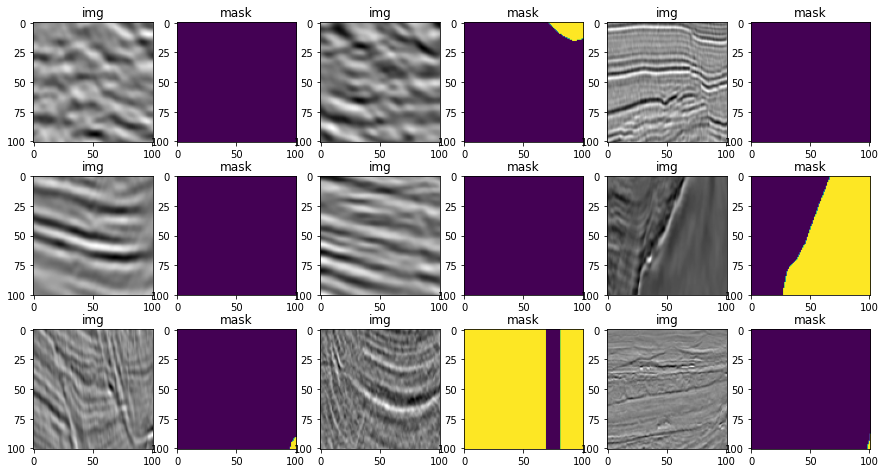

(101, 101, 3)


In [ ]:
# train
# リスト化
# images
path_images = './images' 
img_train = sorted(os.listdir(path_images))
# masks
path_masks = './masks' 
mask_train = sorted(os.listdir(path_masks))

plt.subplots(3,6,figsize=(15, 8))
for n in range(9):
  # 画像確認
  # image
  plt.subplot(3, 6, 2*n+1)
  img = Image.open('./images/' + img_train[n])
  img = np.array(img)
  plt.imshow(img)
  plt.title('img')
  # mask
  plt.subplot(3, 6, 2*(n+1))
  mask = Image.open('./masks/' + mask_train[n])
  mask = np.array(mask)
  plt.imshow(mask)
  plt.title('mask')
plt.show()
# shape確認
print(img.shape)

In [ ]:
# compe
# リスト化
# images
path_images = './compe/competition_data/train/images'
img_train = sorted(os.listdir(path_images))
# masks
path_masks = './compe/competition_data/train/masks'
mask_train = sorted(os.listdir(path_masks))

plt.subplots(3,6,figsize=(15, 8))
for n in range(9):
  # 画像確認
  # image
  plt.subplot(3, 6, 2*n+1)
  img = Image.open('./compe/competition_data/train/images/' + img_train[n])
  img = np.array(img)
  plt.imshow(img)
  plt.title('img')
  # mask
  plt.subplot(3, 6, 2*(n+1))
  mask = Image.open('./compe/competition_data/train/masks/' + mask_train[n])
  mask = np.array(mask)
  plt.imshow(mask)
  plt.title('mask')
plt.show()
# shape確認
print(img.shape)


In [ ]:
pwd

'/content/drive/My Drive/Sprint19'

In [ ]:
!mkdir gitcode
!git clone https://github.com/zhixuhao/unet ./gitcode/

Cloning into './gitcode'...
remote: Enumerating objects: 394, done.
remote: Total 394 (delta 0), reused 0 (delta 0), pack-reused 394
Receiving objects: 100% (394/394), 44.92 MiB | 16.82 MiB/s, done.
Resolving deltas: 100% (79/79), done.
Checking out files: 100% (253/253), done.


In [ ]:
# ファイル名などをgitと同じにする
# オリジナルデータの移動
!mkdir data_origin
!mv ./gitcode/data/ ./data_origin/

In [ ]:
# 使用するデータの移動
!mkdir ./gitcode/data/

In [ ]:
!mv ./images/ ./gitcode/
!mv ./masks/ ./gitcode/

mv: cannot stat './images/': No such file or directory


In [ ]:
cd gitcode

/content/drive/My Drive/Sprint19/gitcode


In [ ]:
!mkdir ./data/membrane/train

In [ ]:
!mkdir ./data/membrane/test

In [ ]:
!mv ./image/ ./data/membrane/
!mv ./label/ ./data/membrane/

In [ ]:
!mv ./data/membrane/image/ ./data/membrane/train/
!mv ./data/membrane/label/ ./data/membrane/train/

In [ ]:
!unzip /content/drive/'My Drive'/Sprint19/test.zip

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: images/187ecc32d5.png   
  inflating: images/54538419f5.png   
  inflating: images/93614d4b95.png   
  inflating: images/50a91adce8.png   
  inflating: images/97d23cea10.png   
  inflating: images/ca04c19c0b.png   
  inflating: images/d168218bac.png   
  inflating: images/a670e833a4.png   
  inflating: images/a964a0f499.png   
  inflating: images/371bf59030.png   
  inflating: images/fc74f77bae.png   
  inflating: images/f63dc1e3be.png   
  inflating: images/b807539a5f.png   
  inflating: images/1dfcbf4bca.png   
  inflating: images/a971d2ae53.png   
  inflating: images/4ad823e2d3.png   
  inflating: images/85a9687a4f.png   
  inflating: images/da5b430ecd.png   
  inflating: images/b1a2903d1c.png   
  inflating: images/70958cacd4.png   
  inflating: images/2093e5c98e.png   
  inflating: images/f2c108fd0b.png   
  inflating: images/56b0d83562.png   
  inflating: images/09aa9bde24.png   
  inflating: images/3cb4906b6e.png   
  inflating: image

In [ ]:
cd drive/My Drive/Sprint19/gitcode

/content/drive/My Drive/Sprint19/gitcode


In [ ]:
!mv ./images/ ./data/membrane/test/

In [ ]:
pwd

'/content/drive/My Drive/Sprint19/gitcode'

In [ ]:
!python main.py

Using TensorFlow backend.
2020-06-25 06:54:18.388511: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-06-25 06:54:19.655154: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-25 06:54:19.681195: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-06-25 06:54:19.681800: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P4 computeCapability: 6.1
coreClock: 1.1135GHz coreCount: 20 deviceMemorySize: 7.43GiB deviceMemoryBandwidth: 178.99GiB/s
2020-06-25 06:54:19.681864: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-06-25 06:54:19.683657: I tensorflow/strea

In [ ]:
pwd

'/content/drive/My Drive/Sprint19/gitcode'

In [ ]:
train_label = Image.open('./data/membrane/train/image/00a3af90ab.png')
train_label = np.array(train_label)
train_label

array([[[139, 139, 139],
        [136, 136, 136],
        [136, 136, 136],
        ...,
        [126, 126, 126],
        [123, 123, 123],
        [118, 118, 118]],

       [[138, 138, 138],
        [140, 140, 140],
        [140, 140, 140],
        ...,
        [127, 127, 127],
        [118, 118, 118],
        [110, 110, 110]],

       [[142, 142, 142],
        [140, 140, 140],
        [138, 138, 138],
        ...,
        [134, 134, 134],
        [129, 129, 129],
        [125, 125, 125]],

       ...,

       [[153, 153, 153],
        [158, 158, 158],
        [137, 137, 137],
        ...,
        [117, 117, 117],
        [112, 112, 112],
        [124, 124, 124]],

       [[153, 153, 153],
        [170, 170, 170],
        [158, 158, 158],
        ...,
        [117, 117, 117],
        [110, 110, 110],
        [120, 120, 120]],

       [[144, 144, 144],
        [152, 152, 152],
        [162, 162, 162],
        ...,
        [120, 120, 120],
        [111, 111, 111],
        [110, 110, 110]]

In [ ]:
train_label = Image.open('./data/membrane/train/label/00a3af90ab.png')
train_label = np.array(train_label)
train_label

array([[    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       ...,
       [    0,     0,     0, ..., 65535, 65535, 65535],
       [    0,     0,     0, ..., 65535, 65535, 65535],
       [    0,     0,     0, ..., 65535, 65535, 65535]], dtype=int32)

In [ ]:
test_image = Image.open('./data/membrane/test/images/0a0cc52eca.png')
test_image = np.array(test_image)
test_image

array([[[ 93,  93,  93],
        [ 95,  95,  95],
        [100, 100, 100],
        ...,
        [139, 139, 139],
        [135, 135, 135],
        [143, 143, 143]],

       [[ 97,  97,  97],
        [102, 102, 102],
        [110, 110, 110],
        ...,
        [107, 107, 107],
        [109, 109, 109],
        [118, 118, 118]],

       [[107, 107, 107],
        [112, 112, 112],
        [117, 117, 117],
        ...,
        [ 64,  64,  64],
        [ 67,  67,  67],
        [ 70,  70,  70]],

       ...,

       [[123, 123, 123],
        [118, 118, 118],
        [113, 113, 113],
        ...,
        [157, 157, 157],
        [147, 147, 147],
        [123, 123, 123]],

       [[124, 124, 124],
        [120, 120, 120],
        [113, 113, 113],
        ...,
        [154, 154, 154],
        [160, 160, 160],
        [147, 147, 147]],

       [[127, 127, 127],
        [121, 121, 121],
        [116, 116, 116],
        ...,
        [131, 131, 131],
        [150, 150, 150],
        [154, 154, 154]]

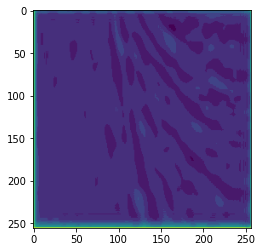

In [ ]:
# pred
#path_pred = './data/membrane/test_pred'
#pred = sorted(os.listdir(path_pred))

# 画像確認
pred = Image.open('./data/membrane/test/images/24_predict.png')
pred = np.array(pred)
plt.imshow(pred)
plt.show()

##【問題2】コードリーディング
論文[1]に目を通した上で、上記実装のコードリーディングを行ってください。

unet
model.py、エンコードとデコード✖︎５層、各層でスキップコネクション
データ前処理
data.py、画像のサイズなどが異なっても学習できるように前処理が行われる、マスクと画像を同時に生成できる
また、trainはtrainGenerator、testはtestGeneratorで処理。

In [ ]:
pwd

'/content/drive/My Drive'

In [ ]:
cd ..

/content/drive/My Drive/Sprint19


In [ ]:
cd ..

/content/drive/My Drive


In [ ]:
!mkdir Reference
!git clone https://github.com/shibata0827/diveintocode-ml ./Reference/

Cloning into './Reference'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 421 (delta 8), reused 20 (delta 8), pack-reused 399
Receiving objects: 100% (421/421), 123.96 MiB | 14.02 MiB/s, done.
Resolving deltas: 100% (122/122), done.
Checking out files: 100% (119/119), done.
